In [1]:
import numpy as np
from scipy.stats import uniform

In [2]:
#Generating uniform random variable
unif_array=uniform.rvs(size=1000)

In [3]:
#Generating exponential random variable
lambda_val=1
expo_array=-np.log(1-unif_array)/lambda_val

In [4]:
from scipy.stats import norm

In [5]:
#Generating standard random variable
norm_array=norm.rvs(size=1000)

In [6]:
#applying the Monte Carlo Simulation in python
#simulating the value of the sin integralnp

np.random.seed(0)
msin_estimate=[None]*50
msin_std=[None]*50

for i in range (1,51):
    unif_array=uniform.rvs(size=i*1000)*np.pi
    sin_val=np.sin(unif_array)*np.pi
    msin_estimate[i-1]=np.mean(sin_val)
    msin_std[i-1]=np.std(sin_val)/np.sqrt(i*1000)

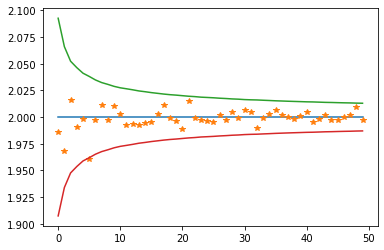

In [7]:
#plotting the graph
import matplotlib.pyplot as plt

plt.plot([2]*50)
plt.plot(msin_estimate,"*")
plt.plot(2+np.array(msin_std)*3)
plt.plot(2-np.array(msin_std)*3)
plt.show()

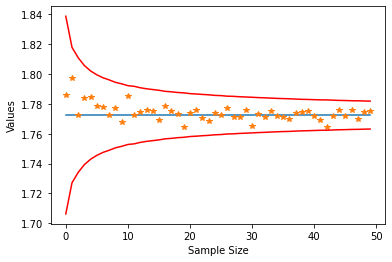

In [11]:
#simulating the value of the e^(-x^2) integralnp

np.random.seed(0)

mexp_est=[None]*50
mexp_std=[None]*50

for i in range (1,51):
    norm_array=norm.rvs(size=i*1000)
    exp_val=np.exp(-norm_array**2/2)*np.sqrt(2*np.pi)
    mexp_est[i-1]=np.mean(exp_val)
    mexp_std[i-1]=np.std(exp_val)/np.sqrt(i*1000)
    

plt.plot([np.sqrt(np.pi)]*50)
plt.plot(mexp_est,"*")
plt.plot(np.sqrt(np.pi)+np.array(mexp_std)*3,"r")
plt.plot(np.sqrt(np.pi)-np.array(mexp_std)*3,"r")
plt.xlabel("Sample Size")
plt.ylabel("Values")
plt.show()

# Option Pricing

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import random

In [22]:
#Stock specific information
risk_free=0.1
S_0=100
sigma=0.3

#Option specific information
strike=110
T=1
current_time=0

In [23]:
#Definig functions for valuations

def terminal_shareprices(S_0,risk_free_rate,sigma,Z,T):
    #generate terminal share price given some random normal values,z#
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T +sigma*np.sqrt(T)*Z)


def discounted_call_payoff(S_T,K,risk_free_rate,T):
    #function for evaluating the discountyed payoff of the call in Monte Carlo Estimation#
    return np.exp(-risk_free_rate*T)*np.maximum(S_T-K,0)

In [24]:
#code for generating Monte Carlo Estimates of vanilla European Call Options
np.random.seed(0)

#Empty array that can be used to store the estimated values for different sample sizes
mcall_estimate=[None]*50
mcall_std=[None]*50

#Generating Monte Carlo Estimate as a function of sample size
for i in range(1,51):
    norm_array1=norm.rvs(size=1000*i)
    term_val=terminal_shareprices(S_0,risk_free,sigma,norm_array1,T-current_time)
    mcall_val=discounted_call_payoff(term_val,strike,risk_free,T-current_time)
    mcall_estimate[i-1]=np.mean(mcall_val)
    mcall_std[i-1]=np.std(mcall_val)/np.sqrt(i*1000)

In [29]:
#code for analytical solution of vanilla European Call Option

d_1=(math.log(S_0/strike)+(risk_free+sigma**2/2)*(T-current_time))/(sigma*math.sqrt(T-current_time))
d_2=d_1-sigma*math.sqrt(T-current_time)

analytic_callprice=S_0*norm.cdf(d_1)-strike*math.exp(-risk_free*(T-current_time))*norm.cdf(d_2)

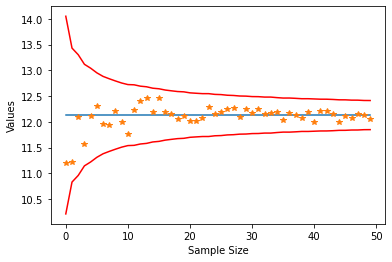

In [33]:
#plotting the graph
plt.plot([analytic_callprice]*50)
plt.plot(mcall_estimate,"*")
plt.plot(analytic_callprice+np.array(mcall_std)*3,"r")
plt.plot(analytic_callprice-np.array(mcall_std)*3,"r")
plt.xlabel("Sample Size")
plt.ylabel("Values")
plt.show()

In [34]:
analytic_callprice

12.131028958035898

In [37]:
term_val

array([153.31342792,  61.56175389, 116.64375714, ..., 116.21819133,
       130.51532697,  73.88541869])